In [191]:
%load_ext autoreload
%autoreload 2

import iris
import numpy as np
from matplotlib import pyplot as plt
import iris.quickplot as qplt
from PyCO2SYS import CO2SYS
from PyCO2SYS.api import CO2SYS_wrap as co2sys
import iris.coord_categorisation
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import iris.plot as iplt
from tqdm import tqdm

Pa_to_uatm = ((1.0/0.9869e-1))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
def extract_and_avg_yr_range(cube,start_year,end_year):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    loc = np.squeeze(np.where((cube.coord('year').points >= start_year) & (cube.coord('year').points <= end_year)))
    return cube[loc].collapsed('time',iris.analysis.MEAN)

def extract_range(cube,start_year,end_year):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    loc = np.squeeze(np.where((cube.coord('year').points >= start_year) & (cube.coord('year').points <= end_year)))
    return cube[loc]

def prepare_cmip_for_co2sys(cube):
    cube_data = cube.data.data
    cube_data[np.where(cube.data.mask)] = np.nan
    return cube_data


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)


def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    return cube_region_tmp.intersection(latitude=(lat_south,lat_north))


def add_year_coord(cube):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    return cube

def sort_years(cube):
    my_sort = np.argsort(cube.coord('year').points)
    return cube[my_sort,:,:]

In [33]:
directory = '/Users/ph290/Downloads/'
# file1 = directory+'test_thetao_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file2 = directory+'test_so_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file3 = directory+'test_dissic_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file4 = directory+'test_talk_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file5 = directory+'test_spco2_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'

model = 'IPSL-CM6A-LR'

file1 = directory+model+'_thetao_r1i1p1f?_g?regridded.nc'
file2 = directory+model+'_so_r1i1p1f?_g?regridded.nc'
file3 = directory+model+'_dissic_r1i1p1f?_g?regridded.nc'
file4 = directory+model+'_talk_r1i1p1f?_g?regridded.nc'
file5 = directory+model+'_spco2_r1i1p1f?_g?regridded.nc'

c_thetao = iris.load_cube(file1)
c_so = iris.load_cube(file2)
c_dissic = iris.load_cube(file3)
c_talk = iris.load_cube(file4)
c_spco2 = iris.load_cube(file5)

# first_years = [2000,2004]
# last_years = [2010,2014]

first_years = [2000,2020]
last_years = [2080,2100]

#create an average of the first 5 years
c_thetao_1 = extract_and_avg_yr_range(c_thetao,first_years[0],first_years[1])
c_so_1 = extract_and_avg_yr_range(c_so,first_years[0],first_years[1])
c_dissic_1 = extract_and_avg_yr_range(c_dissic,first_years[0],first_years[1])
c_talk_1 = extract_and_avg_yr_range(c_talk,first_years[0],first_years[1])
c_spco2_1 = extract_and_avg_yr_range(c_spco2,first_years[0],first_years[1])

#create an average of the last 5 years
c_thetao_2 = extract_and_avg_yr_range(c_thetao,last_years[0],last_years[1])
c_so_2 = extract_and_avg_yr_range(c_so,last_years[0],last_years[1])
c_dissic_2 = extract_and_avg_yr_range(c_dissic,last_years[0],last_years[1])
c_talk_2 = extract_and_avg_yr_range(c_talk,last_years[0],last_years[1])
c_spco2_2 = extract_and_avg_yr_range(c_spco2,last_years[0],last_years[1])

c_thetao_data_1 = prepare_cmip_for_co2sys(c_thetao_1[0])
c_so_data_1 = prepare_cmip_for_co2sys(c_so_1[0])
c_dissic_data_1 = prepare_cmip_for_co2sys(c_dissic_1[0])
c_talk_data_1 = prepare_cmip_for_co2sys(c_talk_1[0])
c_spco2_data_1 = prepare_cmip_for_co2sys(c_spco2_1)

c_thetao_data_2 = prepare_cmip_for_co2sys(c_thetao_2[0])
c_so_data_2 = prepare_cmip_for_co2sys(c_so_2[0])
c_dissic_data_2 = prepare_cmip_for_co2sys(c_dissic_2[0])
c_talk_data_2 = prepare_cmip_for_co2sys(c_talk_2[0])
c_spco2_data_2 = prepare_cmip_for_co2sys(c_spco2_2)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF meas

IndexError: Cannot index with zero length slice.

In [ ]:
# dir(ccrs)
# help(np.ma.masked_where)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


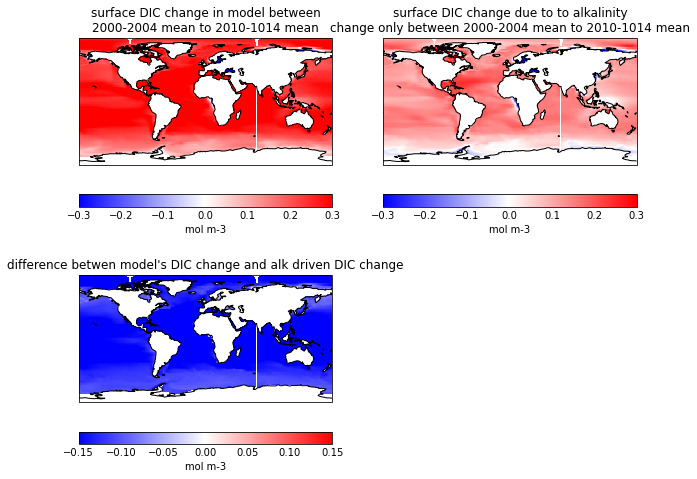

In [34]:
df3 = co2sys(dic=None, alk=c_talk_data_2 * 1.0e3, pco2= c_spco2_data_1 * Pa_to_uatm, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data_1,sal=c_so_data_1, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

TCO2 = df3.TCO2.values.reshape((np.shape(c_dissic_data_2)[0], np.shape(c_dissic_data_2)[1]))

model_dissic_diff = (c_dissic_2[0] - c_dissic_1[0]).data
model_dissic_diff_due_to_alk =(TCO2/1.0e3 - c_dissic_1[0].data)

pcarree = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)

vmin=-0.3
vmax = 0.3
# vmin=-.5
# vmax = .5

ax1 = plt.subplot(gs[0, 0], projection=pcarree)
tmp_cube = c_dissic[0][0].copy()
tmp_cube.data = model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,vmin = vmin,vmax=vmax,cmap='bwr')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between\n2000-2004 mean to 2010-1014 mean')
# fig.colorbar(contour_result, cax=ax1)

ax2 = plt.subplot(gs[0, 1], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = vmin,vmax=vmax,cmap='bwr')
plt.gca().coastlines()
ax2.set_title('surface DIC change due to to alkalinity\nchange only between 2000-2004 mean to 2010-1014 mean')
    
ax3 = plt.subplot(gs[1, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk - model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.150,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax3.set_title("difference betwen model's DIC change and alk driven DIC change" )

plt.savefig('/Users/ph290/Downloads/'+model+'_dic_change_talk.png',dpi=600)

Northhern region

In [37]:
model = 'ACCESS-ESM1-5'

file1 = directory+'region_'+model+'_thetao_r1i1p1f?_g?regridded.nc'
file2 = directory+'region_'+model+'_so_r1i1p1f?_g?regridded.nc'
file3 = directory+'region_'+model+'_dissic_r1i1p1f?_g?regridded.nc'
file4 = directory+'region_'+model+'_talk_r1i1p1f?_g?regridded.nc'
file5 = directory+'region_'+model+'_spco2_r1i1p1f?_g?regridded.nc'

c_thetao_region = iris.load_cube(file1)
c_so_region = iris.load_cube(file2)
c_dissic_region = iris.load_cube(file3)
c_talk_region = iris.load_cube(file4)
c_spco2_region = iris.load_cube(file5)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF meas

In [38]:
first_years = [2000,2020]
last_years = [2080,2100]

#create an average of the first 5 years
c_thetao_1_region = extract_and_avg_yr_range(c_thetao_region,first_years[0],first_years[1])
c_so_1_region = extract_and_avg_yr_range(c_so_region,first_years[0],first_years[1])
c_dissic_1_region = extract_and_avg_yr_range(c_dissic_region,first_years[0],first_years[1])
c_talk_1_region = extract_and_avg_yr_range(c_talk_region,first_years[0],first_years[1])
c_spco2_1_region = extract_and_avg_yr_range(c_spco2_region,first_years[0],first_years[1])

#create an average of the last 5 years
c_thetao_2_region = extract_and_avg_yr_range(c_thetao_region,last_years[0],last_years[1])
c_so_2_region = extract_and_avg_yr_range(c_so_region,last_years[0],last_years[1])
c_dissic_2_region = extract_and_avg_yr_range(c_dissic_region,last_years[0],last_years[1])
c_talk_2_region = extract_and_avg_yr_range(c_talk_region,last_years[0],last_years[1])
c_spco2_2_region = extract_and_avg_yr_range(c_spco2_region,last_years[0],last_years[1])


c_thetao_data_1_region = prepare_cmip_for_co2sys(c_thetao_1_region[0])
c_so_data_1_region = prepare_cmip_for_co2sys(c_so_1_region[0])
c_dissic_data_1_region = prepare_cmip_for_co2sys(c_dissic_1_region[0])
c_talk_data_1_region = prepare_cmip_for_co2sys(c_talk_1_region[0])
c_spco2_data_1_region = prepare_cmip_for_co2sys(c_spco2_1_region)

c_thetao_data_2_region = prepare_cmip_for_co2sys(c_thetao_2_region[0])
c_so_data_2_region = prepare_cmip_for_co2sys(c_so_2_region[0])
c_dissic_data_2_region = prepare_cmip_for_co2sys(c_dissic_2_region[0])
c_talk_data_2_region = prepare_cmip_for_co2sys(c_talk_2_region[0])
c_spco2_data_2_region = prepare_cmip_for_co2sys(c_spco2_2_region)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


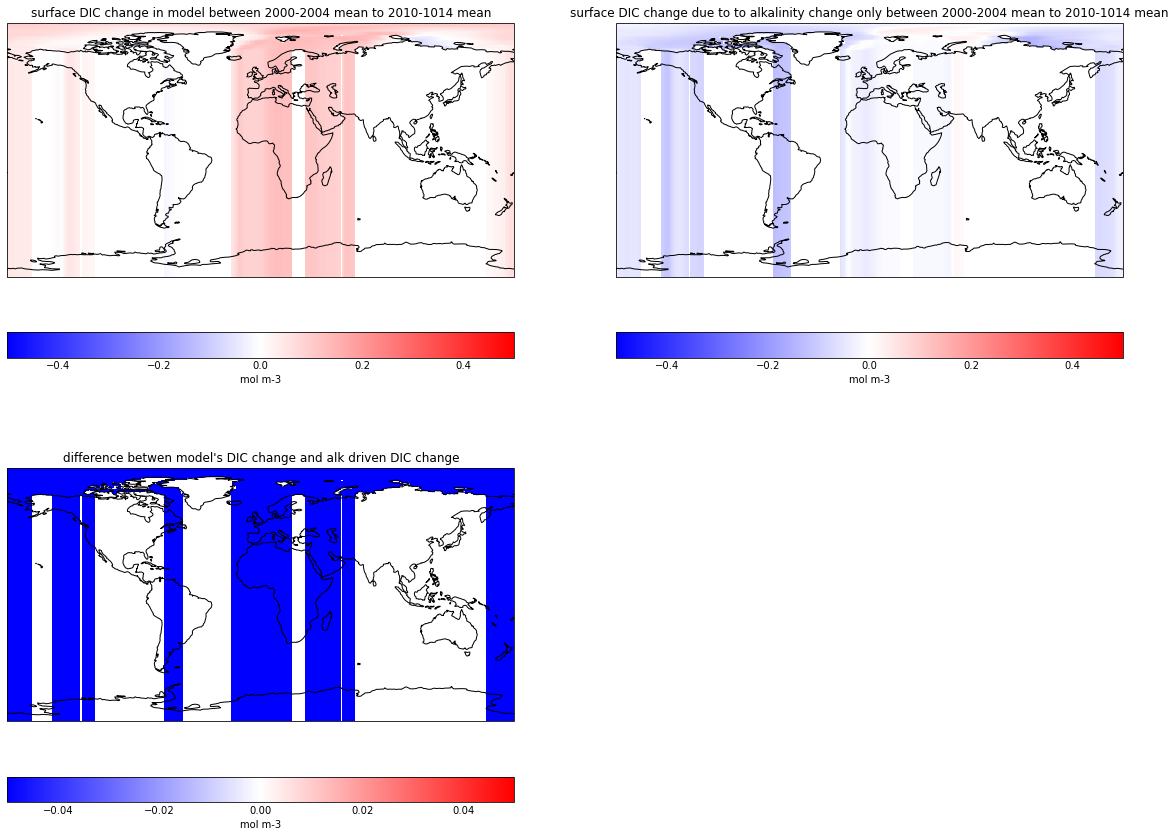

In [39]:
df3 = co2sys(dic=None, alk=c_talk_data_2_region * 1.0e3, pco2= c_spco2_data_1_region * Pa_to_uatm, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data_1_region,sal=c_so_data_1_region, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

TCO2 = df3.TCO2.values.reshape((np.shape(c_talk_data_2_region)[0], np.shape(c_talk_data_2_region)[1]))

model_dissic_diff = (c_dissic_2_region[0] - c_dissic_1_region[0]).data
model_dissic_diff_due_to_alk =(TCO2/1.0e3 - c_dissic_1_region[0].data)

pcarree = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2)

vmin=-0.15
vmax = 0.15
vmin=-.5
vmax = .5

tmp_cube = c_dissic_2_region[0].copy()

ax1 = plt.subplot(gs[0, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,vmin = vmin,vmax=vmax,cmap='bwr')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')
# fig.colorbar(contour_result, cax=ax1)

ax2 = plt.subplot(gs[0, 1], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = vmin,vmax=vmax,cmap='bwr')
plt.gca().coastlines()
ax2.set_title('surface DIC change due to to alkalinity change only between 2000-2004 mean to 2010-1014 mean')
    
ax3 = plt.subplot(gs[1, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk - model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.050,vmax=0.050,cmap='bwr')
plt.gca().coastlines()
ax3.set_title("difference betwen model's DIC change and alk driven DIC change" )

plt.savefig('/Users/ph290/Downloads/ukesm_dic_change_talk_region.png',dpi=300)

## Timeseries of Arctic DIC change from model, and calculated from only alkalinity changing

In [216]:
# models = ['ACCESS-ESM1-5','IPSL-CM6A-LR','CanESM5','CNRM-ESM2-1','GFDL-CM4','MIROC-ES2L','UKESM1-0-LL']
models = ['ACCESS-ESM1-5','CanESM5','CNRM-ESM2-1','GFDL-CM4','MIROC-ES2L','UKESM1-0-LL']

output_dict = {}


for model in models:
    print(model)
    output_dict[model] = {}
    file1 = directory+'region_'+model+'_thetao_r1i1p1f?_g?regridded.nc'
    file2 = directory+'region_'+model+'_so_r1i1p1f?_g?regridded.nc'
    file3 = directory+'region_'+model+'_dissic_r1i1p1f?_g?regridded.nc'
    file4 = directory+'region_'+model+'_talk_r1i1p1f?_g?regridded.nc'
    file5 = directory+'region_'+model+'_spco2_r1i1p1f?_g?regridded.nc'
    file6 = directory+'siconc_SImon*'+model+'*_regrid.nc'

    c_thetao_region = iris.load_cube(file1)
    c_thetao_region = add_year_coord(c_thetao_region)
    c_thetao_region = sort_years(c_thetao_region[:,0,:,:])

    c_so_region = iris.load_cube(file2)
    c_so_region = add_year_coord(c_so_region)
    c_so_region = sort_years(c_so_region[:,0,:,:])
    
    c_dissic_region = iris.load_cube(file3)
    c_dissic_region = add_year_coord(c_dissic_region)
    c_dissic_region = sort_years(c_dissic_region[:,0,:,:])
    
    c_talk_region = iris.load_cube(file4)
    c_talk_region = add_year_coord(c_talk_region)
    c_talk_region = sort_years(c_talk_region[:,0,:,:])
    
    c_spco2_region = iris.load_cube(file5)
    c_spco2_region = add_year_coord(c_spco2_region)
    c_spco2_region = sort_years(c_spco2_region)
    
    c_siconc = iris.load_cube(file6)
    c_siconc = add_year_coord(c_siconc)
    c_siconc = sort_years(c_siconc)
    c_siconc = area_avg(extract_region(c_siconc,-180,180,0.0,90))
    
    try:
        iris.coord_categorisation.add_year(c_siconc, 'time', name='year')
    except:
        pass
    try:
        iris.coord_categorisation.add_month(c_siconc, 'time', name='month')
    except:
        pass
    try:
        iris.coord_categorisation.add_season(c_siconc, 'time', name='season')
    except:
        pass


    first_years = [1900,1920]
    last_years = [2080,2100]
    
    c_thetao_region = extract_range(c_thetao_region,first_years[0],last_years[1])
    c_so_region = extract_range(c_so_region,first_years[0],last_years[1])
    c_dissic_region = extract_range(c_dissic_region,first_years[0],last_years[1])
    c_talk_region = extract_range(c_talk_region,first_years[0],last_years[1])
    c_spco2_region = extract_range(c_spco2_region,first_years[0],last_years[1])
    c_siconc = extract_range(c_siconc,first_years[0],last_years[1])

    #create an average of the first 5 years
    reference_years = [2000,2020]
    c_thetao_1_region = extract_and_avg_yr_range(c_thetao_region,reference_years[0],reference_years[1])
    c_so_1_region = extract_and_avg_yr_range(c_so_region,reference_years[0],reference_years[1])
    c_dissic_1_region = extract_and_avg_yr_range(c_dissic_region,reference_years[0],reference_years[1])
    c_talk_1_region = extract_and_avg_yr_range(c_talk_region,reference_years[0],reference_years[1])
    c_spco2_1_region = extract_and_avg_yr_range(c_spco2_region,reference_years[0],reference_years[1])

    c_thetao_data_1_region = prepare_cmip_for_co2sys(c_thetao_1_region)
    c_so_data_1_region = prepare_cmip_for_co2sys(c_so_1_region)
    c_dissic_data_1_region = prepare_cmip_for_co2sys(c_dissic_1_region)
    c_talk_data_1_region = prepare_cmip_for_co2sys(c_talk_1_region)
    c_spco2_data_1_region = prepare_cmip_for_co2sys(c_spco2_1_region)

    c_talk_data_region = prepare_cmip_for_co2sys(c_talk_region)
    c_spco2_data_region = prepare_cmip_for_co2sys(c_spco2_region)
    
    out_data = c_talk_data_region.copy()
    out_data[:] = np.nan


    # due to alk change
    
    for i in tqdm(range(np.shape(c_talk_data_region)[0])):
    #     print(i)
        df4 = co2sys(dic=None, alk=c_talk_data_region[i] * 1.0e3, pco2= c_spco2_data_1_region * Pa_to_uatm, fco2=None, pH=None,
            carb=None, bicarb=None, co2aq=None,
            temp_in=c_thetao_data_1_region,sal=c_so_data_1_region, si=0, po4=0, nh3=0, h2s=0,
            K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
            buffers_mode="auto", verbose=True)
        out_data[i,:,:] = df4.TCO2.values.reshape((np.shape(c_talk_data_1_region)[0], np.shape(c_talk_data_1_region)[1]))


    c_dissic_region1 = c_dissic_region
    c_dissic_region2 = c_dissic_region.copy()
    c_dissic_region2.data.data[:]= out_data[:].copy()

    c_dissic_region1_avg = area_avg(c_dissic_region1)
    c_dissic_region2_avg = area_avg(c_dissic_region2 * 1.0e-3)

    # due to co2 rise

    try:
        out_data[:] = np.nan
        for i in tqdm(range(np.shape(c_talk_data_region)[0])):
        #     print(i)
            df4 = co2sys(dic=None, alk=c_talk_data_1_region * 1.0e3, pco2= c_spco2_data_region[i] * Pa_to_uatm, fco2=None, pH=None,
                carb=None, bicarb=None, co2aq=None,
                temp_in=c_thetao_data_1_region,sal=c_so_data_1_region, si=0, po4=0, nh3=0, h2s=0,
                K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
                buffers_mode="auto", verbose=True)
            out_data[i,:,:] = df4.TCO2.values.reshape((np.shape(c_talk_data_1_region)[0], np.shape(c_talk_data_1_region)[1]))


        c_dissic_region3 = c_dissic_region.copy()
        c_dissic_region3.data.data[:]= out_data[:].copy()

        c_dissic_region3_avg = area_avg(c_dissic_region3 * 1.0e-3)
    except:
        pass
        
    #output
    
    dissic_yrs = c_dissic_region1_avg.coord('year').points
    model_dic = c_dissic_region1_avg
    DIC_from_alkalinity_change = c_dissic_region2_avg
    DIC_from_pCO2_change = c_dissic_region3_avg
    sept_seaice_conc = c_siconc[c_siconc.coord('month').points == 'Sep']
    seaice_yrs = sept_seaice_conc.coord('year').points
    output_dict[model]['dissic_yrs'] = dissic_yrs
    output_dict[model]['model_dic'] = model_dic 
    output_dict[model]['DIC_from_alkalinity_change'] = DIC_from_alkalinity_change 
    output_dict[model]['DIC_from_pCO2_change'] = DIC_from_pCO2_change 
    output_dict[model]['sept_seaice_conc'] = sept_seaice_conc
    output_dict[model]['seaice_yrs'] = seaice_yrs


    
    


ACCESS-ESM1-5


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF meas

CanESM5


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure vari

CNRM-ESM2-1


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'dissic'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'dissic'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF meas

GFDL-CM4


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'dissic'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'dissic'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:234

MIROC-ES2L


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'dissic'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'dissic'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'talk'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'talk'
  warnings.warn(message % (variable_name, nc_var_name))
/U

UKESM1-0-LL


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserW

In [262]:
for model in models:
    print(model)
    output_dict[model]['sept_seaice_conc'] = np.nan
    output_dict[model]['river_flux'] = np.nan
    output_dict[model]['precip'] = np.nan
    output_dict[model]['seaice_yrs'] = np.nan
    output_dict[model]['apr_seaice_conc'] = np.nan
    output_dict[model]['salinity'] = np.nan
    # pr
    try:
        first_years = [1900,1920]
        last_years = [2080,2100]

        file7 = directory+'pr_Amon_'+model+'_historical_ssp585_r1i1p1f?_g?_regridded.nc'
        c_pr = iris.load_cube(file7)
        c_pr = add_year_coord(c_pr)
        c_pr = sort_years(c_pr)
        c_pr = area_avg(extract_region(c_pr,-180,180,70.0,90))
        try:
            iris.coord_categorisation.add_year(c_pr, 'time', name='year')
        except:
            pass
        c_pr = extract_range(c_pr,first_years[0],last_years[1])
        output_dict[model]['precip'] = c_pr
    except:
        print(model + 'pr failed')

    # river
    try:
        file8 = directory+'friver_Omon_'+model+'_historical_ssp585_r1i1p1f?_g?_regridded.nc'
        c_friver = iris.load_cube(file8)
        c_friver = add_year_coord(c_friver)
        c_friver = sort_years(c_friver)
        c_friver = area_avg(extract_region(c_friver,-180,180,65.0,90))
        try:
            iris.coord_categorisation.add_year(c_friver, 'time', name='year')
        except:
            pass
        c_friver = extract_range(c_friver,first_years[0],last_years[1])
        output_dict[model]['river_flux'] = c_friver
    except:
        print(model + ' friver failed')
        
    # seaice
    try:
        file6 = directory+'siconc_SImon*'+model+'*_regrid.nc'
        c_siconc = iris.load_cube(file6)
        c_siconc = add_year_coord(c_siconc)
        c_siconc = sort_years(c_siconc)
        c_siconc = area_avg(extract_region(c_siconc,-180,180,0.0,90))
        try:
            iris.coord_categorisation.add_year(c_siconc, 'time', name='year')
        except:
            pass
        try:
            iris.coord_categorisation.add_month(c_siconc, 'time', name='month')
        except:
            pass
        try:
            iris.coord_categorisation.add_season(c_siconc, 'time', name='season')
        except:
            pass
        c_siconc = extract_range(c_siconc,first_years[0],last_years[1])
        sept_seaice_conc = c_siconc[c_siconc.coord('month').points == 'Sep']
        seaice_yrs = sept_seaice_conc.coord('year').points
        output_dict[model]['sept_seaice_conc'] = sept_seaice_conc
        output_dict[model]['seaice_yrs'] = seaice_yrs
        sept_seaice_conc = c_siconc[c_siconc.coord('month').points == 'Apr']
        output_dict[model]['apr_seaice_conc'] = sept_seaice_conc
    except:
        print(model + ' sea ice failed')
    # salinity
    try:  
        file2 = directory+'region_'+model+'_so_r1i1p1f?_g?regridded.nc'
        c_so_region = iris.load_cube(file2)
        c_so_region = add_year_coord(c_so_region)
        c_so_region = sort_years(c_so_region[:,0,:,:])
        first_years = [1900,1920]
        last_years = [2080,2100]  
        c_so_region = extract_range(c_so_region,first_years[0],last_years[1])
        output_dict[model]['salinity'] = area_avg(c_so_region)
    except:
        print(model + ' salinity failed')
    
    

    


ACCESS-ESM1-5


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'friver'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/

CanESM5


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'friver'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis

CNRM-ESM2-1
CNRM-ESM2-1pr failed


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'friver'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileform

GFDL-CM4
GFDL-CM4pr failed
GFDL-CM4 friver failed


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordina

MIROC-ES2L


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'friver'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis

UKESM1-0-LL


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'friver'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis

No handles with labels found to put in legend.


ACCESS-ESM1-5


No handles with labels found to put in legend.


CanESM5


No handles with labels found to put in legend.


CNRM-ESM2-1


No handles with labels found to put in legend.


GFDL-CM4


No handles with labels found to put in legend.


MIROC-ES2L


No handles with labels found to put in legend.


UKESM1-0-LL


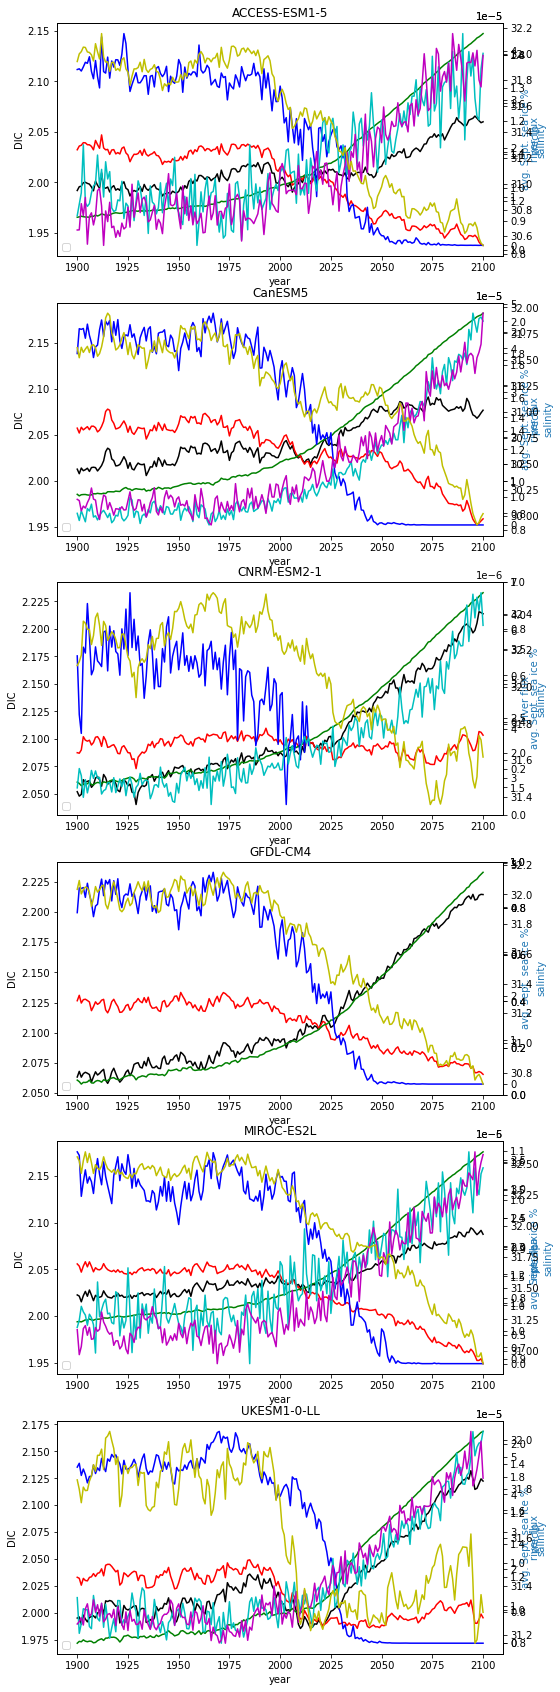

In [273]:
models = ['ACCESS-ESM1-5','CanESM5','CNRM-ESM2-1','GFDL-CM4','MIROC-ES2L','UKESM1-0-LL']


fig, axs = plt.subplots(len(models),figsize=(8,30))


for i,model in enumerate(models):
    print(model)
    # fig, ax1 = plt.subplots()
    axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['model_dic'].data,'k',label='model DIC')
    axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['DIC_from_alkalinity_change'].data,'r',label='DIC from alkalinity change')
    try:
        axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['DIC_from_pCO2_change'].data,'g',label='DIC from pCO2 change')
    except:
        pass
    # ax1.scatter(yrs,c_dissic_region1_avg.data,label='model DIC')
    # ax1.scatter(yrs,c_dissic_region2_avg.data,label='DIC from alkalinity change')
    axs[i].set_ylabel('DIC')
    plt.legend(loc=3)

    ax2 = axs[i].twinx() 
    color = 'tab:blue'
    ax2.plot(output_dict[model]['seaice_yrs'],output_dict[model]['sept_seaice_conc'].data,'b')
    ax2.set_ylabel('avg. Sept. sea ice %', color=color)

    try:
        ax3 = axs[i].twinx() 
        color = 'tab:blue'
        ax3.plot(output_dict[model]['river_flux'].coord('year').points,output_dict[model]['river_flux'].data,'c')
        ax3.set_ylabel('river flux', color=color) 
    except:
        pass
    
    try:
        ax4 = axs[i].twinx() 
        color = 'tab:blue'
        ax4.plot(output_dict[model]['precip'].coord('year').points,output_dict[model]['precip'].data,'m')
        ax4.set_ylabel('precip', color=color)
    except:
        pass

#     try:
    ax5 = axs[i].twinx() 
    color = 'tab:blue'
    ax5.plot(output_dict[model]['salinity'].coord('year').points,output_dict[model]['salinity'].data,'y')
    ax5.set_ylabel('salinity', color=color)
#     except:
#         pass    

    # ax2.set_ylim([3,8])
    axs[i].set_xlabel('year')
    axs[i].set_title(model)
    
    plt.savefig('/Users/ph290/Downloads/multimodel_dic_change_broken_down_region.png',dpi=600)

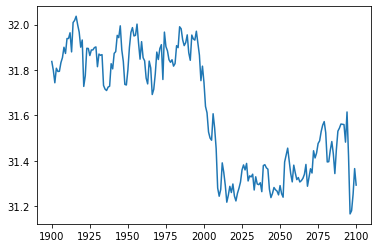

In [259]:
output_dict[models[1]]['salinity']

<iris 'Cube' of sea_water_salinity / (0.001) (-- : 201; latitude: 20; longitude: 360)>

No handles with labels found to put in legend.


ACCESS-ESM1-5


No handles with labels found to put in legend.


CanESM5


No handles with labels found to put in legend.


CNRM-ESM2-1


No handles with labels found to put in legend.


GFDL-CM4


No handles with labels found to put in legend.


MIROC-ES2L


No handles with labels found to put in legend.


UKESM1-0-LL


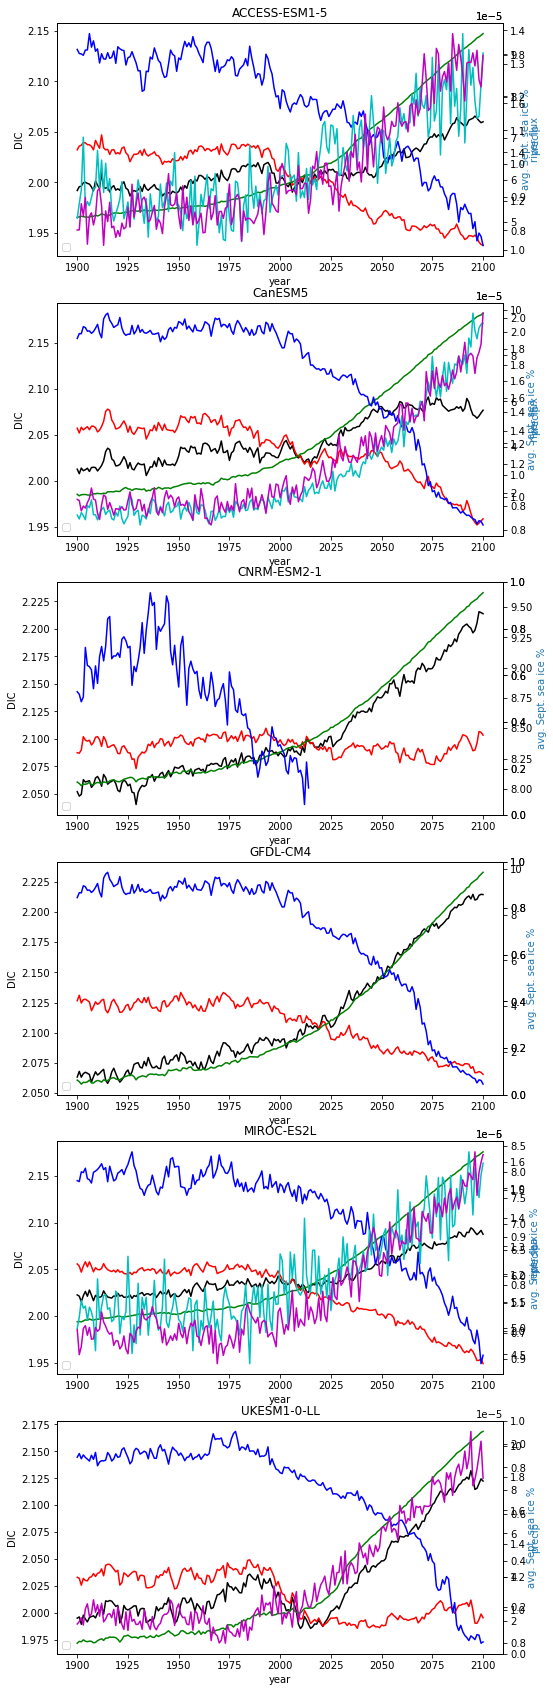

In [227]:
models = ['ACCESS-ESM1-5','CanESM5','CNRM-ESM2-1','GFDL-CM4','MIROC-ES2L','UKESM1-0-LL']


fig, axs = plt.subplots(len(models),figsize=(8,30))


for i,model in enumerate(models):
    print(model)
    # fig, ax1 = plt.subplots()
    axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['model_dic'].data,'k',label='model DIC')
    axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['DIC_from_alkalinity_change'].data,'r',label='DIC from alkalinity change')
    try:
        axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['DIC_from_pCO2_change'].data,'g',label='DIC from pCO2 change')
    except:
        pass
    # ax1.scatter(yrs,c_dissic_region1_avg.data,label='model DIC')
    # ax1.scatter(yrs,c_dissic_region2_avg.data,label='DIC from alkalinity change')
    axs[i].set_ylabel('DIC')
    plt.legend(loc=3)

    ax2 = axs[i].twinx() 
    color = 'tab:blue'
    ax2.plot(output_dict[model]['seaice_yrs'],output_dict[model]['apr_seaice_conc'].data,'b')
    ax2.set_ylabel('avg. Sept. sea ice %', color=color)

    try:
        ax3 = axs[i].twinx() 
        color = 'tab:blue'
        ax3.plot(output_dict[model]['seaice_yrs'],output_dict[model]['river_flux'].data,'c')
        ax3.set_ylabel('river flux', color=color) 
    except:
        pass
    
    try:
        ax4 = axs[i].twinx() 
        color = 'tab:blue'
        ax4.plot(output_dict[model]['seaice_yrs'],output_dict[model]['precip'].data,'m')
        ax4.set_ylabel('precip', color=color)
    except:
        pass
    
    # ax2.set_ylim([3,8])
    axs[i].set_xlabel('year')
    axs[i].set_title(model)
    
    plt.savefig('/Users/ph290/Downloads/multimodel_dic_change_broken_down_region_apr.png',dpi=600)

Text(0.5, 0, 'year')

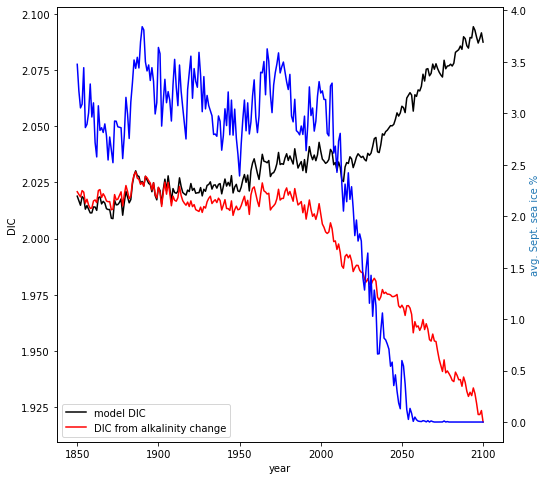

fascinating... is there someunique role alkalinity plays as summer year-round sea-ice is lost,which then diisapears? 

Repeat for other models.

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


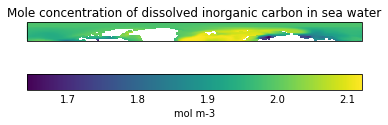

In [56]:
qplt.pcolormesh(c_dissic_region1[0])

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


Text(0.5, 1.0, 'surface DIC change in model between 2000-2004 mean to 2010-1014 mean')

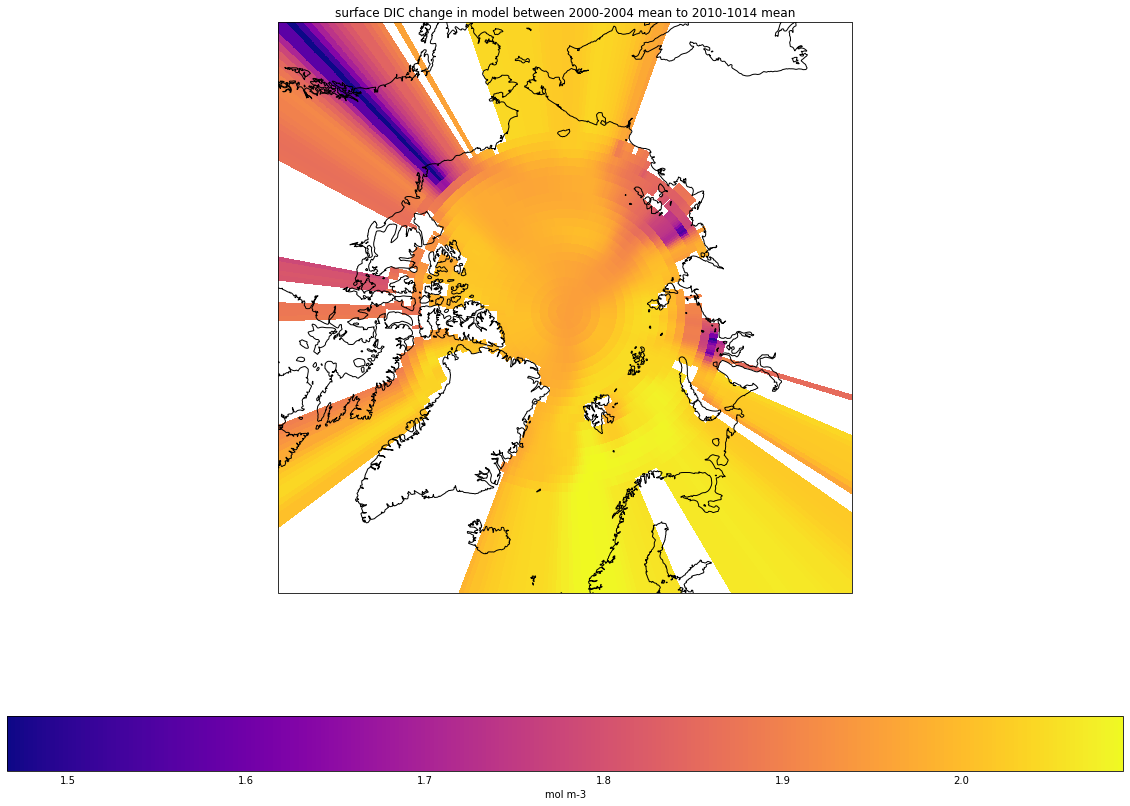

In [97]:
pcarree = ccrs.PlateCarree()
NorthPolarStereo = ccrs.NorthPolarStereo()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(1, 1)

ax1 = plt.subplot(gs[0, 0], projection=NorthPolarStereo)
ax1.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

new_cube, extent = iris.analysis.cartography.project(c_dissic_region1[0], pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,cmap='plasma')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')

In [89]:
dir(ccrs)

['ABCMeta',
 'AlbersEqualArea',
 'AzimuthalEquidistant',
 'CRS',
 'EckertI',
 'EckertII',
 'EckertIII',
 'EckertIV',
 'EckertV',
 'EckertVI',
 'EqualEarth',
 'EquidistantConic',
 'EuroPP',
 'GOOGLE_MERCATOR',
 'Geocentric',
 'Geodetic',
 'Geostationary',
 'Globe',
 'Gnomonic',
 'InterruptedGoodeHomolosine',
 'LambertAzimuthalEqualArea',
 'LambertConformal',
 'LambertCylindrical',
 'Mercator',
 'Miller',
 'Mollweide',
 'NearsidePerspective',
 'NorthPolarStereo',
 'OSGB',
 'OSNI',
 'Orthographic',
 'PROJ4_VERSION',
 'PlateCarree',
 'Projection',
 'Robinson',
 'RotatedGeodetic',
 'RotatedPole',
 'Sinusoidal',
 'SouthPolarStereo',
 'Stereographic',
 'TransverseMercator',
 'UTM',
 'WGS84_SEMIMAJOR_AXIS',
 'WGS84_SEMIMINOR_AXIS',
 '_BoundaryPoint',
 '_CylindricalProjection',
 '_Eckert',
 '_RectangularProjection',
 '_Satellite',
 '_WarpedRectangularProjection',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__document_these__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec_

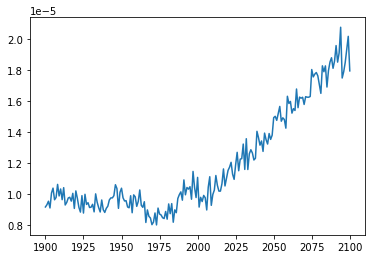

In [238]:
plt.plot(output_dict[models[-1]]['precip'].coord('year').points,output_dict[models[-1]]['precip'].data)

'UKESM1-0-LL'

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
No handles with labels found to put in legend.


UKESM1-0-LL


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Text(0.5, 1.0, 'UKESM1-0-LL')

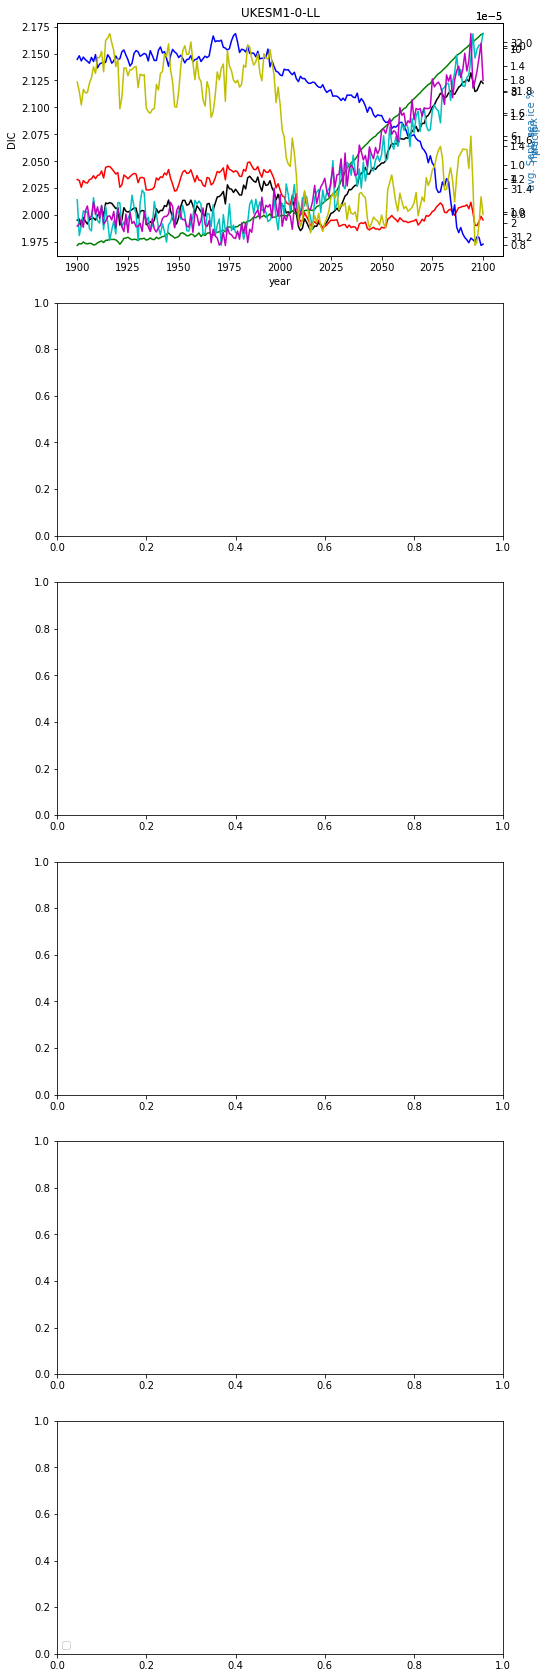

In [247]:
model = 'UKESM1-0-LL'


file2 = directory+'region_'+model+'_so_r1i1p1f?_g?regridded.nc'
c_so_region = iris.load_cube(file2)
c_so_region = add_year_coord(c_so_region)
c_so_region = sort_years(c_so_region[:,0,:,:])
first_years = [1900,1920]
last_years = [2080,2100]  
c_so_region = extract_range(c_so_region,first_years[0],last_years[1])

fig, axs = plt.subplots(len(models),figsize=(8,30))

i=0

print(model)
# fig, ax1 = plt.subplots()
axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['model_dic'].data,'k',label='model DIC')
axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['DIC_from_alkalinity_change'].data,'r',label='DIC from alkalinity change')
try:
    axs[i].plot(output_dict[model]['dissic_yrs'],output_dict[model]['DIC_from_pCO2_change'].data,'g',label='DIC from pCO2 change')
except:
    pass
# ax1.scatter(yrs,c_dissic_region1_avg.data,label='model DIC')
# ax1.scatter(yrs,c_dissic_region2_avg.data,label='DIC from alkalinity change')
axs[i].set_ylabel('DIC')
plt.legend(loc=3)

ax2 = axs[i].twinx() 
color = 'tab:blue'
ax2.plot(output_dict[model]['seaice_yrs'],output_dict[model]['apr_seaice_conc'].data,'b')
ax2.set_ylabel('avg. Sept. sea ice %', color=color)

try:
    ax3 = axs[i].twinx() 
    color = 'tab:blue'
    ax3.plot(output_dict[model]['seaice_yrs'],output_dict[model]['river_flux'].data,'c')
    ax3.set_ylabel('river flux', color=color) 
except:
    pass

try:
    ax4 = axs[i].twinx() 
    color = 'tab:blue'
    ax4.plot(output_dict[model]['seaice_yrs'],output_dict[model]['precip'].data,'m')
    ax4.set_ylabel('precip', color=color)
except:
    pass

ax5 = axs[i].twinx() 
color = 'tab:blue'
ax5.plot(output_dict[models[-1]]['precip'].coord('year').points,area_avg(c_so_region).data,'y')
# plot(output_dict[models[-1]]['precip'].coord('year').points,output_dict[models[-1]]['precip'].data)

# ax2.set_ylim([3,8])
axs[i].set_xlabel('year')
axs[i].set_title(model)



In [242]:
model = 'UKESM1-0-LL'


file2 = directory+'region_'+model+'_so_r1i1p1f?_g?regridded.nc'
c_so_region = iris.load_cube(file2)
c_so_region = add_year_coord(c_so_region)
c_so_region = sort_years(c_so_region[:,0,:,:])


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


masked_array(data=[31.908366692480644, 31.942968063975616,
                   31.933161223778598, 31.98655983653817,
                   32.08287402557786, 32.040677085002244,
                   32.03843149993161, 31.977532343214815,
                   31.90541577635801, 32.01176305363994,
                   31.98687575246713, 32.051474341667436,
                   31.908522853455654, 31.87237823868632,
                   31.956740651186728, 31.966547428981414,
                   32.070363952170595, 32.07135678294798,
                   32.12321933672622, 32.13385975216189,
                   32.16557249121828, 32.160135352542795,
                   32.19635287252811, 32.131532905803205,
                   32.06150406043523, 32.07884572002325,
                   32.158878624056996, 32.118636202291604,
                   32.192653848440585, 32.112100557057154,
                   32.07843524107646, 32.106580420185544,
                   32.12793798185553, 32.158461806766, 32.1039124678812

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinat

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinat

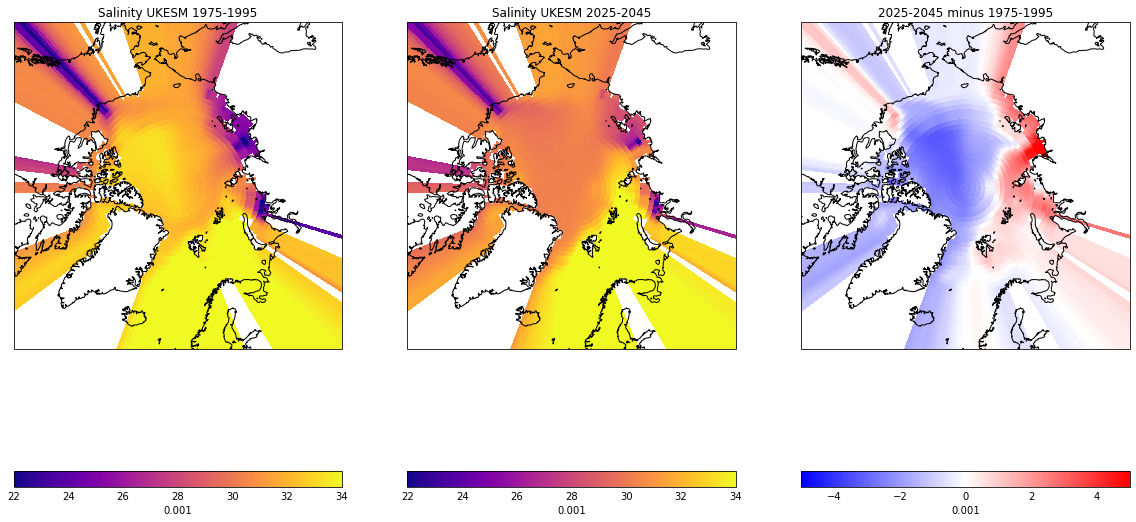

In [309]:
model = 'UKESM1-0-LL'
file2 = directory+'region_'+model+'_so_r1i1p1f?_g?regridded.nc'
c_so_region = iris.load_cube(file2)
c_so_region = add_year_coord(c_so_region)
c_so_region = sort_years(c_so_region[:,0,:,:])
 
c_so_region1 = extract_range(c_so_region,1975,1995).collapsed('time',iris.analysis.MEAN)
c_so_region2 = extract_range(c_so_region,2025,2045).collapsed('time',iris.analysis.MEAN)

pcarree = ccrs.PlateCarree()
NorthPolarStereo = ccrs.NorthPolarStereo()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(1, 3)

ax1 = plt.subplot(gs[0, 0], projection=NorthPolarStereo)
ax1.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

new_cube, extent = iris.analysis.cartography.project(c_so_region1, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,cmap='plasma',vmin=22,vmax=34)
plt.gca().coastlines()

###
ax2 = plt.subplot(gs[0, 1], projection=NorthPolarStereo)
ax2.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

new_cube, extent = iris.analysis.cartography.project(c_so_region2, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,cmap='plasma',vmin=22,vmax=34)
plt.gca().coastlines()

###
ax3 = plt.subplot(gs[0, 2], projection=NorthPolarStereo)
ax3.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

new_cube, extent = iris.analysis.cartography.project(c_so_region2 - c_so_region1, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,cmap='bwr',vmin=-5,vmax=5)
plt.gca().coastlines()

ax1.set_title('Salinity UKESM 1975-1995')
ax2.set_title('Salinity UKESM 2025-2045')
ax3.set_title('2025-2045 minus 1975-1995')
plt.savefig('/Users/ph290/Downloads/salinity_change_across_transition.png',dpi=600)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'talk'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'talk'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coord

Text(0.5, 1.0, '2025-2045 minus 1975-1995')

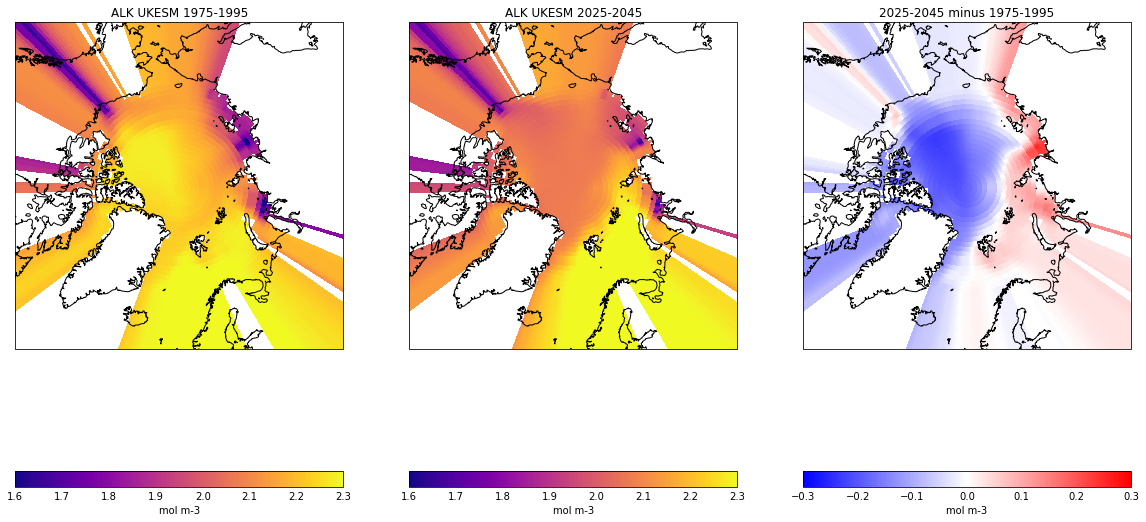

In [311]:
model = 'UKESM1-0-LL'
file2 = directory+'region_'+model+'_talk_r1i1p1f?_g?regridded.nc'
c_so_region = iris.load_cube(file2)
c_so_region = add_year_coord(c_so_region)
c_so_region = sort_years(c_so_region[:,0,:,:])
 
c_so_region1 = extract_range(c_so_region,1975,1995).collapsed('time',iris.analysis.MEAN)
c_so_region2 = extract_range(c_so_region,2025,2045).collapsed('time',iris.analysis.MEAN)

pcarree = ccrs.PlateCarree()
NorthPolarStereo = ccrs.NorthPolarStereo()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(1, 3)

ax1 = plt.subplot(gs[0, 0], projection=NorthPolarStereo)
ax1.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

new_cube, extent = iris.analysis.cartography.project(c_so_region1, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,cmap='plasma',vmin=1.6,vmax=2.3)
plt.gca().coastlines()

###
ax2 = plt.subplot(gs[0, 1], projection=NorthPolarStereo)
ax2.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

new_cube, extent = iris.analysis.cartography.project(c_so_region2, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,cmap='plasma',vmin=1.6,vmax=2.3)
plt.gca().coastlines()

###
ax3 = plt.subplot(gs[0, 2], projection=NorthPolarStereo)
ax3.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

new_cube, extent = iris.analysis.cartography.project(c_so_region2 - c_so_region1, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,cmap='bwr',vmin=-0.3,vmax=0.3)
plt.gca().coastlines()

ax1.set_title('ALK UKESM 1975-1995')
ax2.set_title('ALK UKESM 2025-2045')
ax3.set_title('2025-2045 minus 1975-1995')
